In [1]:
import flare_id
import pandas as pd
import matplotlib.pyplot as plt
import importlib
importlib.reload(flare_id)

/home/idavis/anaconda3/lib/python3.9/site-packages/lightkurve/config/__init__.py:119: UserWarning: The default Lightkurve cache directory, used by download(), etc., has been moved to /home/idavis/.lightkurve/cache. Please move all the files in the legacy directory /home/idavis/.lightkurve-cache to the new location and remove the legacy directory. Refer to https://docs.lightkurve.org/reference/config.html#default-cache-directory-migration for more information.
  warnings.warn(


<module 'flare_id' from '/home/idavis/Documents/flare_id/flare_id.py'>

## Loading in the list of TIC numbers and associated temperatures and radii:

In [2]:
tic_list = pd.read_csv('tic_list.csv')
tics = list(tic_list['TIC'])
temps = list(tic_list['Teff'])
radii = list(tic_list['Rad'])

## Instantiating the Star object using the TIC number, radius, and temperature:

Period: 1.4658147865551407 days


<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

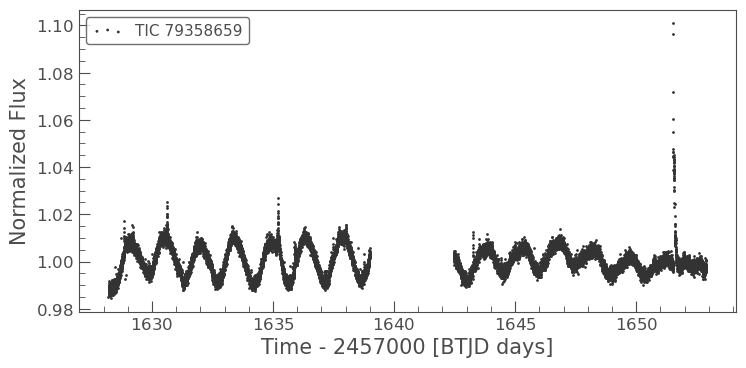

In [3]:
i = 87
star = flare_id.Star(tics[i], radius = radii[i], temperature = temps[i],sectors = range(1,13))
print(f"Period: {star.period} days")
star.lcs.stitch().scatter()

## Instantiating the Flares object that holds information/functions necessary for finding flares:

6 flares found


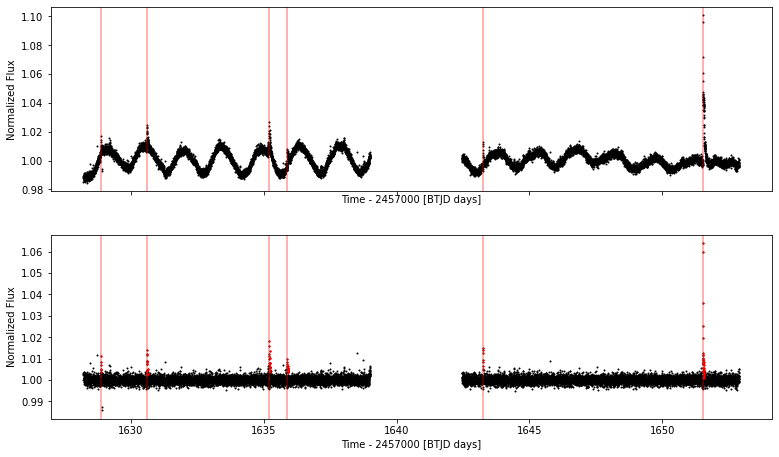

In [4]:
fl = flare_id.Flares(star)
fl.SplitLightCurve()
fl.FlagLightCurves()
fl.FindAllFlares()
print(f"{len(fl.flare_table)} flares found")
fig, axs = fl.PlotLightCurves()
fig.set_figheight(7)
fig.set_figwidth(12)

## Checking the flagged light curve:


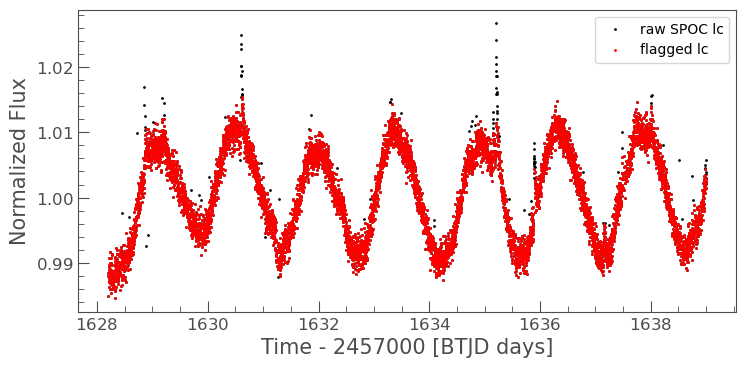

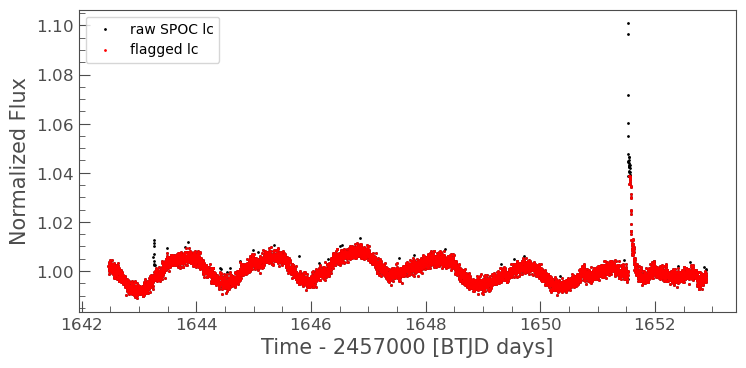

In [5]:
for i in range(len(fl.lc_arr)):
    ax = fl.lc_arr[i].scatter(c = 'k')
    fl.lc_flagged[i].scatter(ax = ax, c = 'r')
    ax.legend(['raw SPOC lc','flagged lc'])
    

You might notice from the preceding light curves, that in the second curve, the large flare at the end is being partially incorporated in the flagged light curve when it shouldn't be. When calculating the energy of this flare, it will then be underestimated. This can happen when the window size for making the median filter is too small. We can fix this by making the window size bigger:

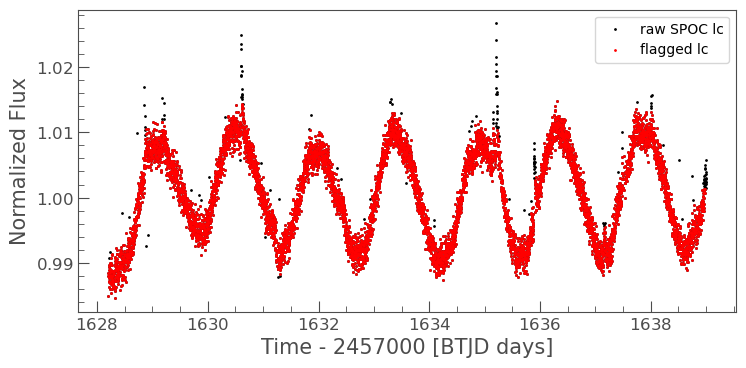

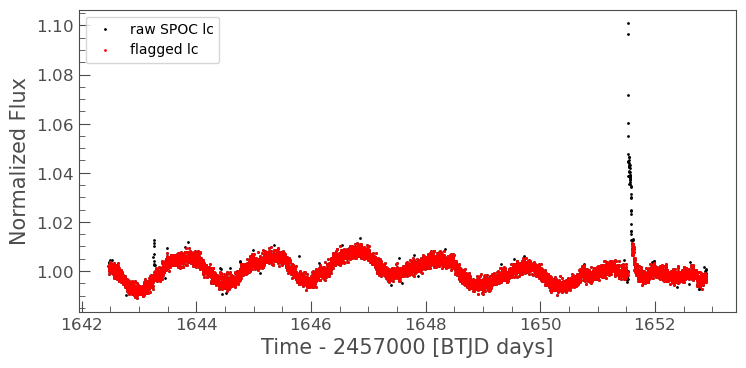

In [6]:
fl.window = 2 * fl.window +1
fl.FlagLightCurves()
for i in range(len(fl.lc_arr)):
    ax = fl.lc_arr[i].scatter(c = 'k')
    fl.lc_flagged[i].scatter(ax = ax, c = 'r')
    ax.legend(['raw SPOC lc','flagged lc'])

Much less of the large flare is now being incorporated in the flagged light curve!

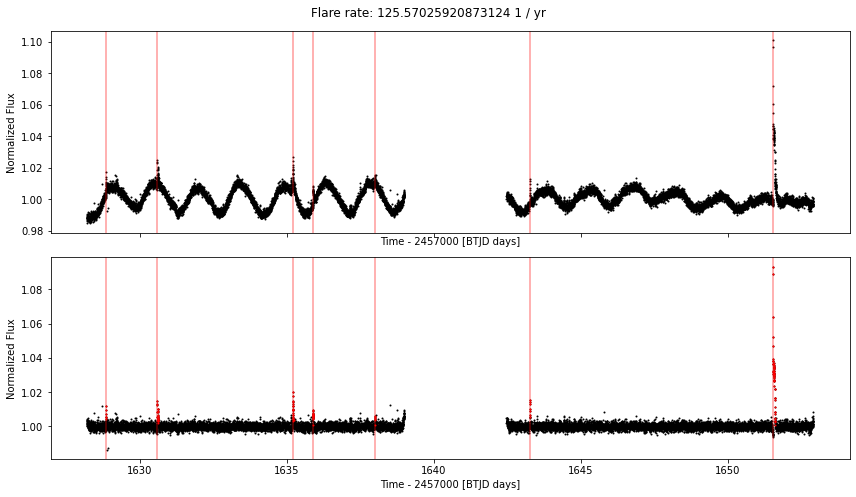

In [7]:
fl.FindAllFlares()
fig, axs = fl.PlotLightCurves()

fig.set_figheight(7)
fig.set_figwidth(12)
fig.suptitle(f"Flare rate: {fl.flare_rate}")
fig.tight_layout()

You can compare the scale of the y-axis of the normalized plot here to the scale of the y-axis of the previous normalized plot-- the highest flux reached is much higher now because we corrected the flagged light curve. We even found an extra flare now!

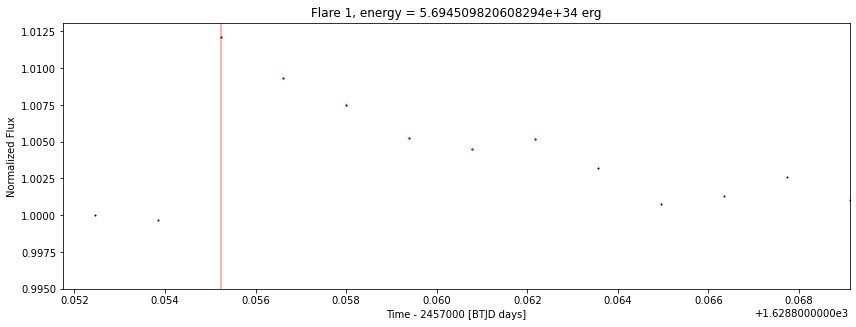

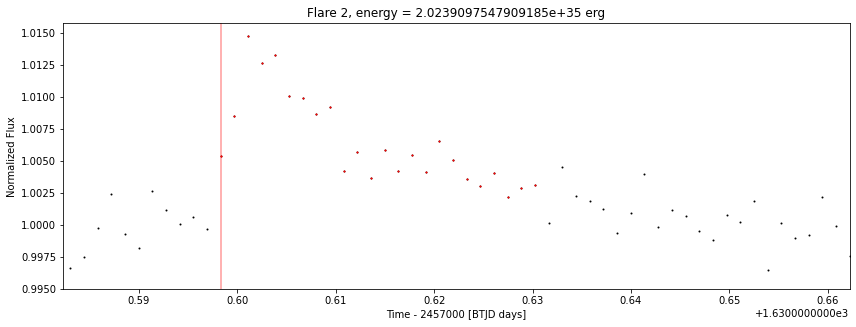

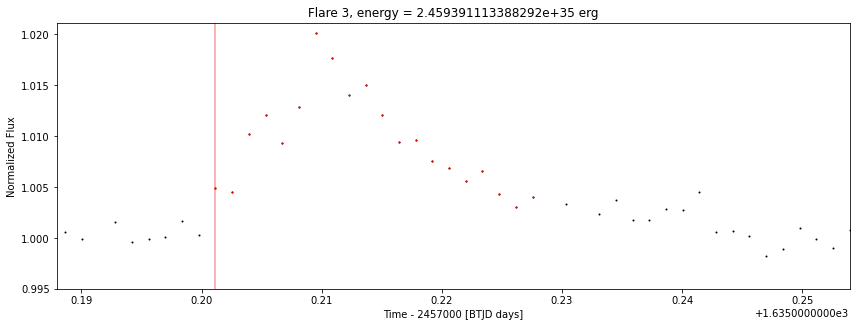

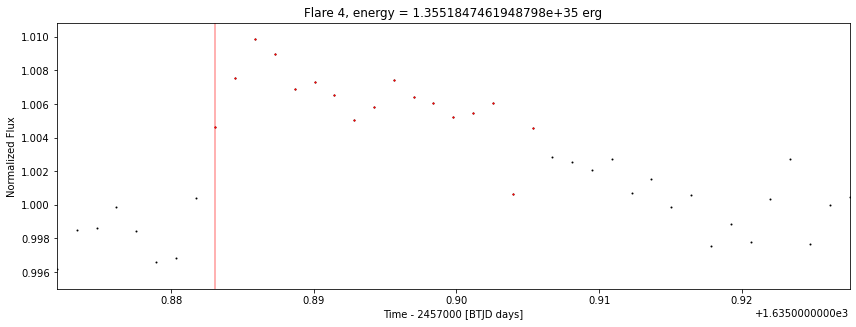

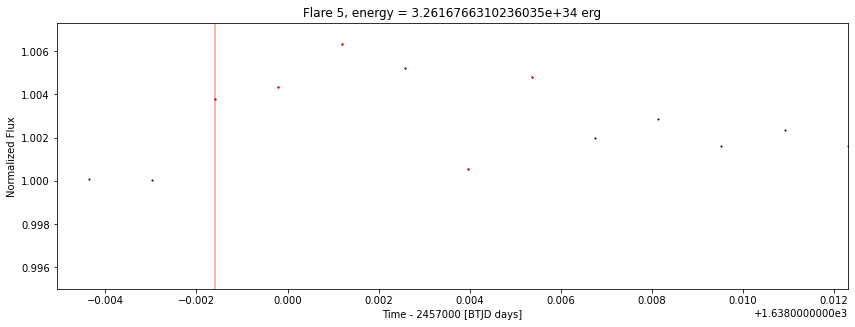

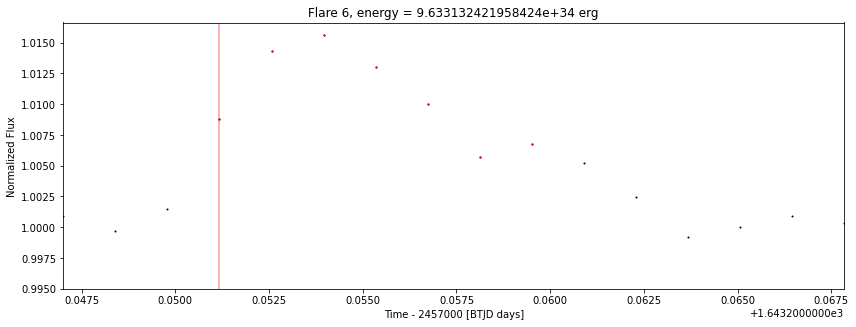

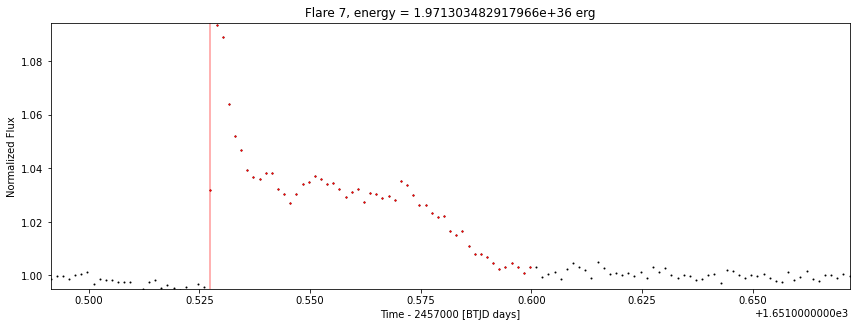

In [8]:
for i in range(len(fl.flare_table)):
    start = fl.flare_table[i]['flare_start']
    duration = fl.flare_table[i]['duration'] /(24 * 3600) # convert from seocnds to days
    end = start + duration
    fig, ax = fl.PlotLightCurves()
    fig.delaxes(ax[0])
    ax[1].set_xlim((start-duration/2,end + duration))
    ax[1].set_ylim((0.995,max(fl.flares[i].flux.data)*1.001))
    fig.set_figheight(8.5)
    fig.set_figwidth(12)
    ax[1].set_title(f"Flare {i + 1}, energy = {fl.flare_table[i]['energy']} erg")
    fig.tight_layout()

Maybe we don't think Flare 5 is actually a flare. We can remove it from our sample and recalculate the flare rate:

In [9]:
fl.FlagFlares([4])
fl.CalculateFlareRate()

print(f"New flare rate: {fl.flare_rate}")

New flare rate: 107.63165075034108 1 / yr


## Saving information about the system:

If you don't specify the base_dir variable, it'll save to the directory that you are working in. The directory naming convention is `TIC{tic_num}/`

In [10]:
fl.WriteOutData()

mkdir: cannot create directory ‘TIC79358659/’: File exists


## Load it back in:

In [12]:
import glob
dirs = glob.glob('TIC*/')
fl = flare_id.LoadInStar(dirs[0])
fl.star.id_number

79358659

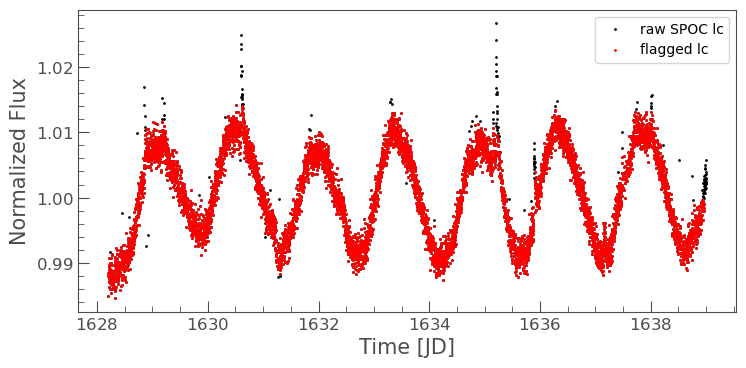

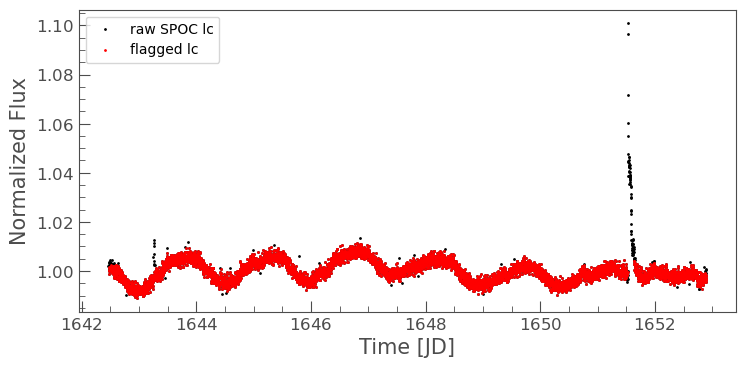

In [13]:
fl.window = 2 * fl.window +1
fl.FlagLightCurves()
for i in range(len(fl.lc_arr)):
    ax = fl.lc_arr[i].scatter(c = 'k')
    fl.lc_flagged[i].scatter(ax = ax, c = 'r')
    ax.legend(['raw SPOC lc','flagged lc'])